# Aufgabe 11: Fisher-Diskriminante per Hand

### a) 
Berechne Mittelwerte und Streumatrizen

In [1]:
import numpy as np

In [95]:
pop_0 = np.array([[1,1], [2,1], [1.5,2], [2,2], [2,3], [3,3]])
pop_1 = np.array([ [1.5,1], [2.5,1], [3.5,1], [2.5,2], [3.5,2], [4.5,2]])
pop_0 = pop_0.reshape(-1,2,1)
pop_1 = pop_1.reshape(-1,2,1)
pop_0

array([[[1. ],
        [1. ]],

       [[2. ],
        [1. ]],

       [[1.5],
        [2. ]],

       [[2. ],
        [2. ]],

       [[2. ],
        [3. ]],

       [[3. ],
        [3. ]]])

In [96]:
mean_0 = np.mean(pop_0, axis=0)
mean_1 = np.mean(pop_1, axis=0)
mean_0, mean_1

(array([[1.91666667],
        [2.        ]]), array([[3. ],
        [1.5]]))

In [91]:
pop_0.reshape(6,2,1) - np.array([1,0]).reshape(2,1)

array([[[0. ],
        [1. ]],

       [[1. ],
        [1. ]],

       [[0.5],
        [2. ]],

       [[1. ],
        [2. ]],

       [[1. ],
        [3. ]],

       [[2. ],
        [3. ]]])

In [83]:
lambdasch = 7.25/29 * np.array([-1,1]).reshape(2,1)
lambdasch

array([[-0.25],
       [ 0.25]])

In [106]:
pop_0.reshape(1,2,6)

array([[[1. , 1. , 2. , 1. , 1.5, 2. ],
        [2. , 2. , 2. , 3. , 3. , 3. ]]])

In [104]:
proj_0 = pop_0.reshape(1,2,6).T@lambdasch
#proj_1 = pop_1@lambdasch
#proj_0 = proj_0.T.reshape(6)
#proj_1 = proj_1.T.reshape(6)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

In [2]:
import matplotlib.pyplot as plt

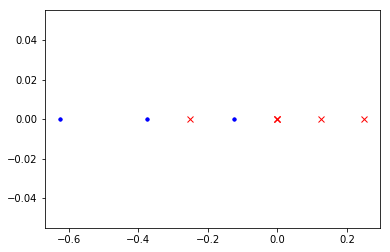

In [85]:
plt.plot(proj_0, np.zeros(6), 'rx')
plt.plot(proj_1, np.zeros(6), 'b.')

# Aufgabe 12: Implementierung

### a)
Berechne Mittelwerte der Populationen

In [3]:
import pandas as pd

In [4]:
pop_0 = pd.read_hdf('zwei_populationen.h5', key='P_0_10000').values.reshape(-1,2,1)
pop_1 = pd.read_hdf('zwei_populationen.h5', key='P_1').values.reshape(-1,2,1)

In [5]:
mean_0 = np.mean(pop_0, axis=0).reshape(2,1)
mean_1 = np.mean(pop_1, axis=0).reshape(2,1)
print(mean_0,'\n \n ', mean_1)

[[-2.13894633e-03]
 [ 2.99221382e+00]] 
 
  [[6.02103083]
 [3.09681674]]


### b) Berechnung der Streumatrizen

In [162]:
pop_0

array([[[-0.90887545],
        [ 3.59803109]],

       [[ 7.48563596],
        [ 6.79548733]],

       [[ 6.62939673],
        [10.53458944]],

       ...,

       [[ 1.57602902],
        [ 3.35084629]],

       [[-1.68130854],
        [ 3.50353978]],

       [[ 1.93327967],
        [ 2.90897025]]])

In [6]:
s0 = np.matrix(pop_0 - mean_0)
s1 = np.matrix(pop_1 - mean_1)

S_0 = s0.T@s0
S_1 = s1.T@s1
S_0, S_1

(matrix([[123654.33129396,  82293.165209  ],
         [ 82293.165209  ,  67696.84792999]]),
 matrix([[122817.91617545,  73753.56149132],
         [ 73753.56149132,  54294.60338217]]))

Die Streumatrix ist die Summe:

In [7]:
S_W = S_0 + S_1
S_W

matrix([[246472.24746941, 156046.72670032],
        [156046.72670032, 121991.45131216]])

Kombinierte Kovarianzmatrix:

In [8]:
S_B = np.matrix((mean_0 - mean_1)*(mean_0 - mean_1).T)
S_B

matrix([[3.62785742e+01, 6.30041173e-01],
        [6.30041173e-01, 1.09417718e-02]])

### c) Konstruktion von Lambdasch

In [9]:
lambdasch = np.linalg.inv(S_W)*(mean_0 - mean_1)
lambdasch

matrix([[-0.00012567],
        [ 0.0001599 ]])

In [10]:
lambdasch = lambdasch/np.linalg.norm(lambdasch)
lambdasch

matrix([[-0.61793837],
        [ 0.78622654]])

In [11]:
a =lambdasch[1]/lambdasch[0]
a = np.array(a).reshape(1)
a

array([-1.2723381])

In [12]:
np.array(lambdasch[0]).reshape(1)

array([-0.61793837])

### d)

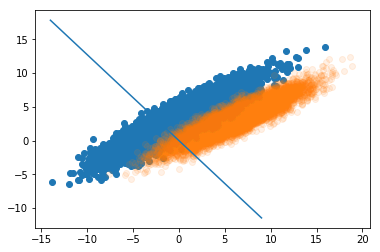

In [23]:
plt.scatter(pop_0[:,0], pop_0[:,1], alpha=1)
plt.scatter(pop_1[:,0], pop_1[:,1], alpha=.1)
plt.plot(np.arange(-14,10,1), a*np.arange(-14,10,1))
#plt.plot([-10*np.array(lambdasch[0]).reshape(1), 10*np.array(lambdasch[0]).reshape(1)], [-10*np.array(lambdasch[1]).reshape(1), 10*np.array(lambdasch[1]).reshape(1)])

In [13]:
proj_0 = np.array(np.matrix(pop_0)*lambdasch).reshape(-1)
proj_1 = np.array(np.matrix(pop_1)*lambdasch).reshape(-1)

Text(0.5, 0, 'Projektion auf $\\vec{\\lambda}$')

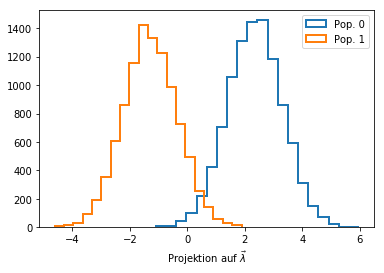

In [14]:
plt.hist(proj_0, bins=20, label='Pop. 0', histtype='step', linewidth=2)
plt.hist(proj_1, bins=20, label='Pop. 1', histtype='step', linewidth=2)
plt.legend()
plt.xlabel(r'Projektion auf $\vec{\lambda}$')

### e) Reinheit und Effizienz

In [15]:
def Reinhart(lambdasch_cut):
    Reinhart = []
    for i in lambdasch_cut:
        tp = len(proj_0[proj_0>i])
        fp = len(proj_1[proj_1>i])
        Reinhart.append(tp/(tp+fp))
    return Reinhart

def Effizienz(lambdasch_cut):
    Effizienz = []
    for i in lambdasch_cut:
        tp = len(proj_0[proj_0>i])
        fn = len(proj_0[proj_0<i])
        Effizienz.append(tp/(tp+fn))
    return Effizienz

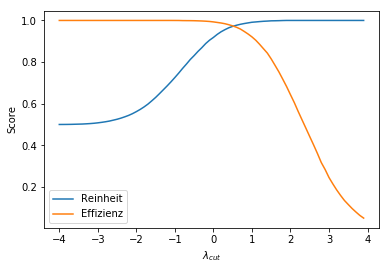

In [16]:
x = np.arange(-4,4,1e-1)
plt.plot(x, Reinhart(x), label='Reinheit')
plt.plot(x, Effizienz(x), label='Effizienz')
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel('Score')
plt.legend()

### f)  Signal-Rausch-Verhältnis

In [17]:
def SNR(lambdasch_cut):
    SNR = []
    for i in lambdasch_cut:
        S = len(proj_0[proj_0>i])
        B = len(proj_1[proj_1>i])
        SNR.append(S/B)
    return SNR

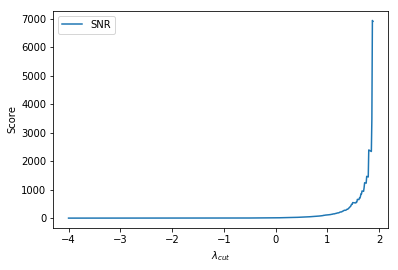

In [18]:
x = np.arange(-4,max(proj_1),1e-2)
plt.plot(x, SNR(x), label='SNR')
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel('Score')
plt.legend()

### g) Signifikanz

In [19]:
def Signifikanz(lambdasch_cut):
    Signifikanz = []
    for i in lambdasch_cut:
        S = len(proj_0[proj_0>i])
        B = len(proj_1[proj_1>i])
        Signifikanz.append(S/np.sqrt(S+B))
    return Signifikanz

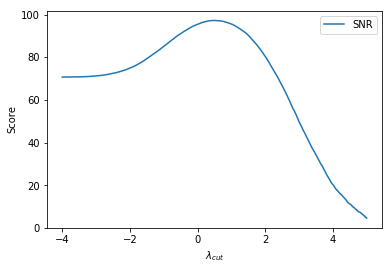

In [20]:
x = np.arange(-4,5,1e-2)
plt.plot(x, Signifikanz(x), label='SNR')
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel('Score')
plt.legend()

In [21]:
x = np.arange(-4,5,1e-2)
signifikanzen = Signifikanz(x)
l_cut = x[np.argmax(signifikanzen)]

Text(0.5, 0, 'Projektion auf $\\vec{\\lambda}$')

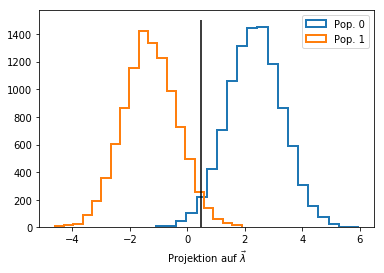

In [22]:
plt.hist(proj_0, bins=20, label='Pop. 0', histtype='step', linewidth=2)
plt.hist(proj_1, bins=20, label='Pop. 1', histtype='step', linewidth=2)
plt.vlines(l_cut,0,1500)
plt.legend()
plt.xlabel(r'Projektion auf $\vec{\lambda}$')

# Aufgabe 15: Trennende Geraden

### a)  
Stellen Sie die beiden Populationen zusammen in einem zweidimensionalen Scat-
terplot dar und zeichnen Sie die drei Projektionsgeraden ein. Im Folgenden werden
diese beiden Populationen mit 𝑃0 und 𝑃1 bezeichnet.

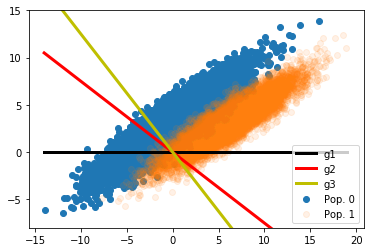

In [52]:
plt.scatter(pop_0[:,0], pop_0[:,1], alpha=1, label='Pop. 0')
plt.scatter(pop_1[:,0], pop_1[:,1], alpha=.1, label='Pop. 1')
plt.plot(np.arange(-14,20,1), -(0)*np.arange(-14,20,1), label='g1', linewidth = 3, c='k')
plt.plot(np.arange(-14,20,1), -(3/4)*np.arange(-14,20,1), label='g2', linewidth = 3, c='r')
plt.plot(np.arange(-14,20,1), -(5/4)*np.arange(-14,20,1), label='g3', linewidth = 3, c='y')
plt.ylim(-8,15)
plt.legend()

### b)
Projizieren Sie die Punkte aus Population 𝑃0 und 𝑃1 jeweils auf die Geraden 𝑔1 , 𝑔2 und 𝑔3.  
Bestimmen und normieren Sie vorher den Projektionsvektor und wählen sie das Vorzeichen so,  
dass die projizierte Population 𝑃0 rechts (zu größeren Werten) von 𝑃1 liegt.  
Stellen Sie die projizierten Populationen 𝑃0

In [47]:
lambdasch1 = np.matrix([1,0]).reshape(-1,1)
lambdasch2 = np.matrix([1,-.75]).reshape(-1,1)
lambdasch3 = np.matrix([1,-1.25]).reshape(-1,1)
lambdasch1 = -lambdasch1/np.linalg.norm(lambdasch1)
lambdasch2 = -lambdasch2/np.linalg.norm(lambdasch2)
lambdasch3 = -lambdasch3/np.linalg.norm(lambdasch3)
lambdasch1

matrix([[-1.],
        [ 0.]])

In [48]:
proj_01 = np.array(np.matrix(pop_0)*lambdasch1).reshape(-1)
proj_11 = np.array(np.matrix(pop_1)*lambdasch1).reshape(-1)

proj_02 = np.array(np.matrix(pop_0)*lambdasch2).reshape(-1)
proj_12 = np.array(np.matrix(pop_1)*lambdasch2).reshape(-1)

proj_03 = np.array(np.matrix(pop_0)*lambdasch3).reshape(-1)
proj_13 = np.array(np.matrix(pop_1)*lambdasch3).reshape(-1)

Text(0.5, 0, 'Projektion auf $\\vec{\\lambda}$')

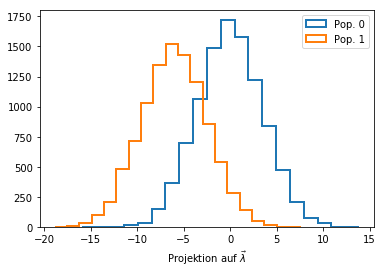

In [49]:
plt.hist(proj_01, bins=20, label='Pop. 0', histtype='step', linewidth=2)
plt.hist(proj_11, bins=20, label='Pop. 1', histtype='step', linewidth=2)
plt.legend()
plt.xlabel(r'Projektion auf $\vec{\lambda}$')

Text(0.5, 0, 'Projektion auf $\\vec{\\lambda}$')

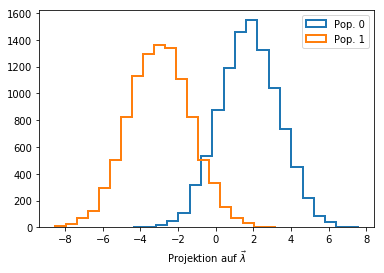

In [50]:
plt.hist(proj_02, bins=20, label='Pop. 0', histtype='step', linewidth=2)
plt.hist(proj_12, bins=20, label='Pop. 1', histtype='step', linewidth=2)
plt.legend()
plt.xlabel(r'Projektion auf $\vec{\lambda}$')

Text(0.5, 0, 'Projektion auf $\\vec{\\lambda}$')

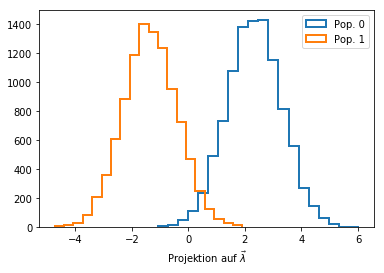

In [51]:
plt.hist(proj_03, bins=20, label='Pop. 0', histtype='step', linewidth=2)
plt.hist(proj_13, bins=20, label='Pop. 1', histtype='step', linewidth=2)
plt.legend()
plt.xlabel(r'Projektion auf $\vec{\lambda}$')

### c)

In [60]:
def Reinhart(lambdasch_cut, data0, data1):
    Reinhart = []
    for i in lambdasch_cut:
        tp = len(data0[data0>i])
        fp = len(data1[data1>i])
        Reinhart.append(tp/(tp+fp))
    return Reinhart

def Effizienz(lambdasch_cut, data0, data1):
    Effizienz = []
    for i in lambdasch_cut:
        tp = len(data0[data0>i])
        fn = len(data0[data0<i])
        Effizienz.append(tp/(tp+fn))
    return Effizienz

In [59]:
Reinhart((3,0),proj_01, proj_11)

[0.9738658777120316, 0.9205529953917051]

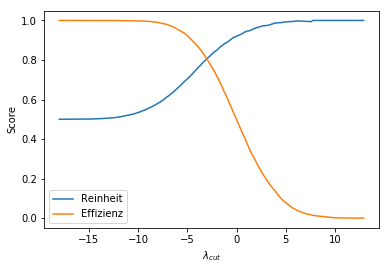

In [62]:
x = np.arange(-18,13,1e-1)
plt.plot(x, Reinhart(x, proj_01, proj_11), label='Reinheit')
plt.plot(x, Effizienz(x, proj_01, proj_11), label='Effizienz')
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel('Score')
plt.legend()
plt.title(r'Projektion g_1')

Text(0.5, 1.0, 'Projektion g_2')

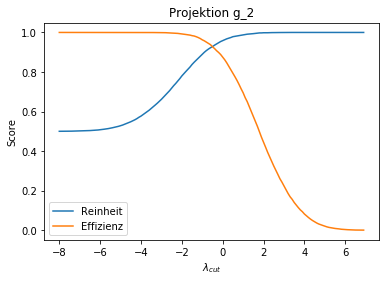

In [65]:
x = np.arange(-8,7,1e-1)
plt.plot(x, Reinhart(x, proj_02, proj_12), label='Reinheit')
plt.plot(x, Effizienz(x, proj_02, proj_12), label='Effizienz')
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel('Score')
plt.legend()
plt.title(r'Projektion g_2')

Text(0.5, 1.0, 'Projektion g_3')

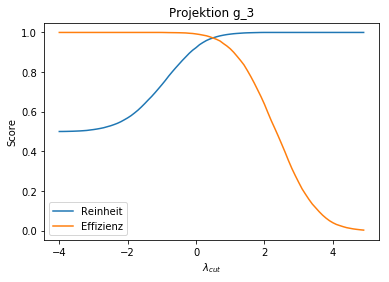

In [67]:
x = np.arange(-4,5,1e-1)
plt.plot(x, Reinhart(x, proj_03, proj_13), label='Reinheit')
plt.plot(x, Effizienz(x, proj_03, proj_13), label='Effizienz')
plt.xlabel(r'$\lambda_{cut}$')
plt.ylabel('Score')
plt.legend()
plt.title(r'Projektion g_3')